In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# plt.style.use('dark_background')
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [39]:
train_directory = '/content/drive/MyDrive/ML_project_course/dataset'
# test_directory = '/home/tsaileshkumar/ML_Project/dataset/test'

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
) 

train_generator = train_datagen.flow_from_directory(
train_directory, 
target_size=(224,224), 
color_mode='rgb', 
batch_size=32, 
class_mode='binary', 
subset='training',
shuffle=True,
seed=42
)
validation_generator = val_datagen.flow_from_directory(
train_directory,
target_size=(224,224), 
color_mode='rgb', 
batch_size=32, 
class_mode='binary', 
subset='validation', 
shuffle=False
)

Found 267 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [41]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# class MixupImageDataGenerator(ImageDataGenerator):
#     def __init__(self, mixup_alpha=0.2, cutmix_alpha=1.0, *args, **kwargs):
#         super().__init__(
#             zoom_range=0.2,
#             rotation_range=20,
#             horizontal_flip=True,
#             vertical_flip=True,
#             rescale=1./255,
#             validation_split=0.2,
#             featurewise_center=True,
#             featurewise_std_normalization=True,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             shear_range=0.2, 
#             fill_mode='nearest',
#             *args,
#             **kwargs,
#         )
#         self.mixup_alpha = mixup_alpha
#         self.cutmix_alpha = cutmix_alpha

#     def mixup(self, X1, Y1, X2, Y2):
#         batch_size = len(X1)
#         l = np.random.beta(self.mixup_alpha, self.mixup_alpha, batch_size)
#         X_l = l.reshape(batch_size, 1, 1, 1)
#         Y_l = l.reshape(batch_size, 1)
#         X = X1 * X_l + X2 * (1 - X_l)
#         Y = Y1 * Y_l + Y2 * (1 - Y_l)
#         return X, Y

#     def cutmix(self, X1, Y1, X2, Y2):
#         batch_size, height, width, channels = X1.shape
#         cut_ratio = np.sqrt(1.0 - np.random.beta(self.cutmix_alpha, self.cutmix_alpha))
#         cut_w = np.int(width * cut_ratio)
#         cut_h = np.int(height * cut_ratio)
#         center_x = np.random.randint(width)
#         center_y = np.random.randint(height)
#         x1 = np.clip(center_x - cut_w // 2, 0, width)
#         y1 = np.clip(center_y - cut_h // 2, 0, height)
#         x2 = np.clip(center_x + cut_w // 2, 0, width)
#         y2 = np.clip(center_y + cut_h // 2, 0, height)
#         mask = np.zeros((batch_size, height, width, channels))
#         mask[:, y1:y2, x1:x2, :] = 1.0
#         X = X1 * mask + X2 * (1 - mask)
#         Y = Y1 * cut_ratio + Y2 * (1 - cut_ratio)
#         return X, Y

#     def flow(self, *args, **kwargs):
#         batches = super().flow(*args, **kwargs)
#         while True:
#             batch_x, batch_y = next(batches)
#             if self.mixup_alpha > 0:
#                 X2, Y2 = next(batches)
#                 batch_x, batch_y = self.mixup(batch_x, batch_y, X2, Y2)
#             elif self.cutmix_alpha > 0:
#                 X2, Y2 = next(batches)
#                 batch_x, batch_y = self.cutmix(batch_x, batch_y, X2, Y2)
#             yield (batch_x, batch_y)


In [42]:
# train_datagen = MixupImageDataGenerator(
#     mixup_alpha=0.2,
#     cutmix_alpha=1.0,
#     )

# val_datagen = MixupImageDataGenerator(
#     mixup_alpha=0.2,
#     cutmix_alpha=1.0,
#     )

# train_generator = train_datagen.flow_from_directory(
# train_directory, 
# target_size=(224,224), 
# color_mode='rgb', 
# batch_size=32, 
# class_mode='binary', 
# subset='training',
# shuffle=True,
# seed=42
# )

# validation_generator = val_datagen.flow_from_directory(
# train_directory,
# target_size=(224,224), 
# color_mode='rgb', 
# batch_size=32, 
# class_mode='binary', 
# subset='validation', 
# shuffle=False
# )


   


In [43]:
# fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
# for i in range(4):
#     for j in range(4):
#         image, label = next(train_generator)
#         axes[i, j].imshow(image[1])
#         axes[i, j].set_title(f"Class: {label[1]}")
#         axes[i, j].axis("off")
# plt.tight_layout()
# plt.show()

In [58]:
import math
# learning rate schedule
def step_decay(epoch):
 initial_lrate = 0.1
 drop = 0.5
 epochs_drop = 10.0
 lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
 return lrate

In [65]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

# Compile model
sgd = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

model.compile(loss=keras.losses.binary_crossentropy, optimizer = sgd, metrics=['accuracy'])

In [66]:
# IMG_SIZE = 224
# inputs = Input(shape = (224,224, 3))

# model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1))(inputs)
# model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = BatchNormalization(momentum=0.15)(model)
# model = MaxPool2D(pool_size=(2, 2))(model)
# model = Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
# model = Dropout(rate=0.3)(model)

# model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = BatchNormalization(momentum=0.15)(model)
# model = MaxPool2D(pool_size=(2, 2))(model)
# model = Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
# model = BatchNormalization(momentum=0.15)(model)
# model = Dropout(rate=0.3)(model)

# model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = BatchNormalization(momentum=0.15)(model)
# model = MaxPool2D(pool_size=(2, 2))(model)
# model = Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
# model = BatchNormalization(momentum=0.15)(model)
# model = Dropout(rate=0.3)(model)

# model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
# model = BatchNormalization(momentum=0.15)(model)
# model = MaxPool2D(pool_size=(2, 2))(model)
# model = Conv2D(filters=256, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
# model = BatchNormalization(momentum=0.15)(model)
# model = Dropout(rate=0.3)(model)

# model = Flatten()(model)
# model = Dense(1024, activation = "relu")(model)
# model = Dropout(rate=0.3)(model)
# dense = Dense(512, activation = "relu")(model)

# head_root = Dense(168, activation = 'softmax')(dense)
# head_vowel = Dense(11, activation = 'softmax')(dense)
# head_consonant = Dense(1, activation = 'sigmoid')(dense)


# model=tf.keras.Model(inputs=inputs, outputs=head_consonant)
# # Compile model

# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# # learning schedule callback
# # lrate=uler(step_decay)
# # callbacks_list = [lrate]= LearningRateSched
# # dense.compile(loss=keras.losses.binary_crossentropy, optimizer = sgd, metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_93 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 52, 52, 128)      

In [68]:
from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}

In [69]:
history_of_model = model.fit(train_generator, epochs=20, validation_data=validation_generator,class_weight=class_weights,callbacks=callbacks_list)

Epoch 1/20
9/9 [==============================] - 7s 436ms/step - loss: 1579907.6250 - accuracy: 0.5618 - val_loss: 95.0547 - val_accuracy: 0.2923 - lr: 0.1000
Epoch 2/20
9/9 [==============================] - 5s 500ms/step - loss: 1037.6975 - accuracy: 0.4794 - val_loss: 856.8574 - val_accuracy: 0.2923 - lr: 0.1000
Epoch 3/20
9/9 [==============================] - 5s 596ms/step - loss: 340.6180 - accuracy: 0.4757 - val_loss: 32.5815 - val_accuracy: 0.2923 - lr: 0.1000
Epoch 4/20
9/9 [==============================] - 5s 539ms/step - loss: 8.9594 - accuracy: 0.5281 - val_loss: 1.3721 - val_accuracy: 0.7077 - lr: 0.1000
Epoch 5/20
9/9 [==============================] - 6s 670ms/step - loss: 6.3198 - accuracy: 0.5393 - val_loss: 6.9341 - val_accuracy: 0.2923 - lr: 0.1000
Epoch 6/20
9/9 [==============================] - 4s 494ms/step - loss: 3.1781 - accuracy: 0.5131 - val_loss: 1.0181 - val_accuracy: 0.2923 - lr: 0.1000
Epoch 7/20
9/9 [==============================] - 5s 534ms/step - l

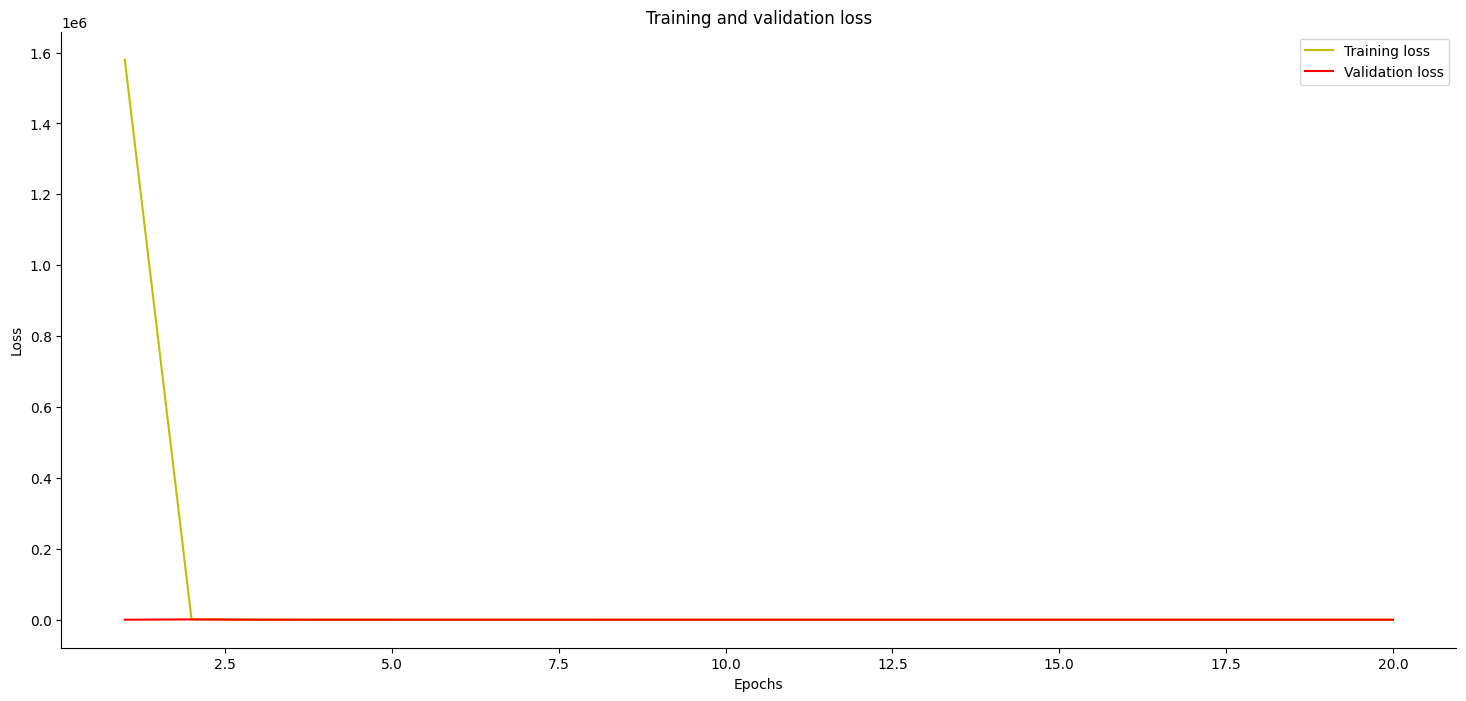

In [70]:
loss = history_of_model.history['loss']
val_loss = history_of_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

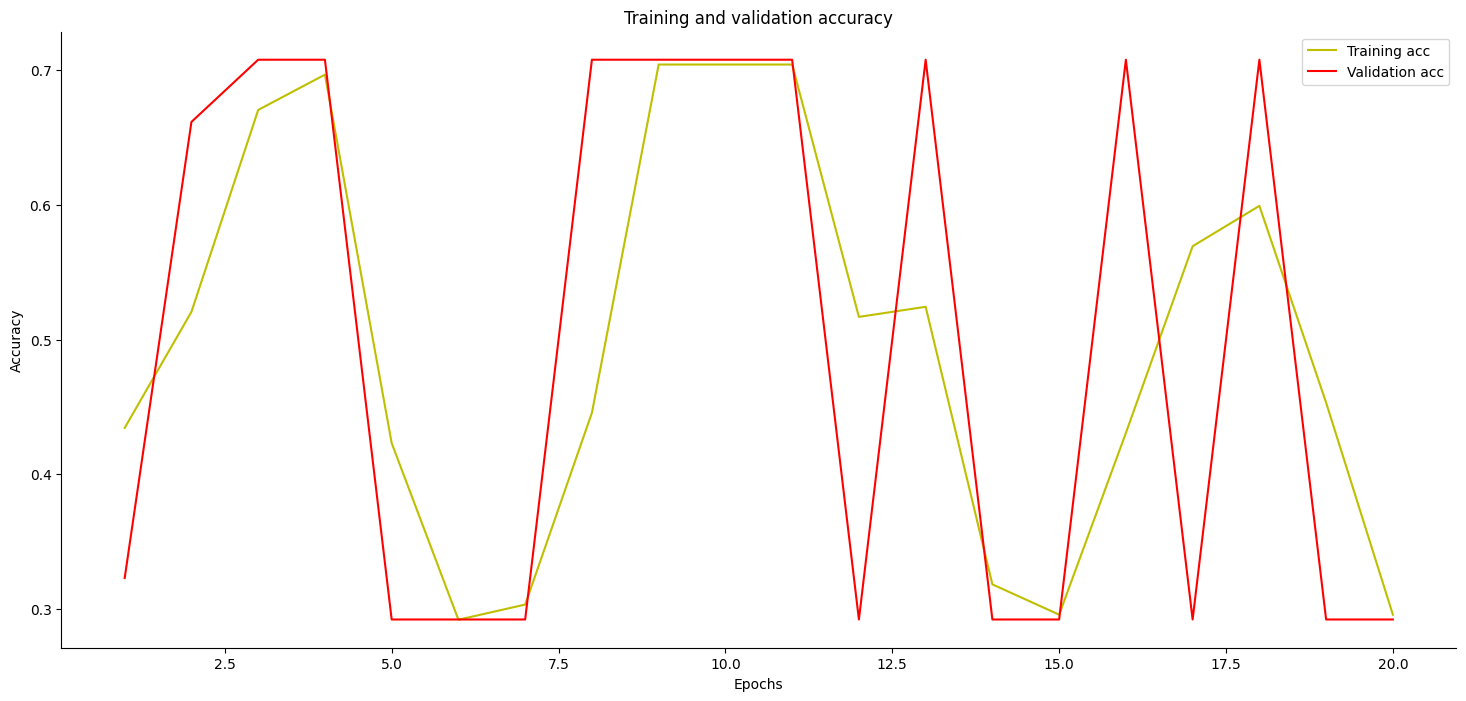

In [56]:
acc = history_of_model.history['accuracy']
val_acc = history_of_model.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

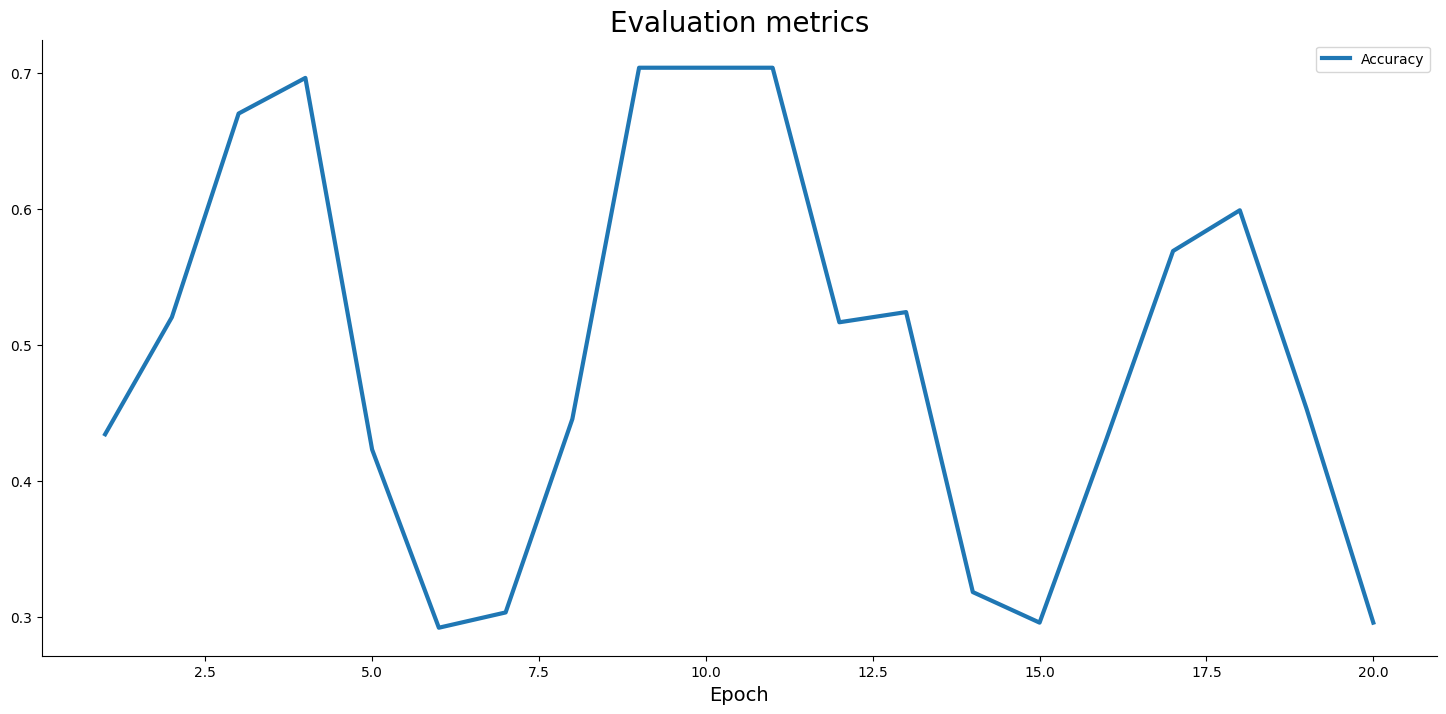

In [57]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 


# plt.plot(
#     np.arange(1, 21), 
#     history_of_model.history['loss'], 
#     label='Loss', lw=3
# )
plt.plot(
    np.arange(1, 21), 
    history_of_model.history['accuracy'], 
    label='Accuracy', lw=3
)
# plt.plot(
#     np.arange(1, 21), 
#     history_of_model.history['lr'], 
#     label='Learning rate', color='#999', lw=3, linestyle='--'
# )
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();